In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
# genetrator faster to others to chosse one by one

train_ds = keras.utils.image_dataset_from_directory(
    directory = 'dataset/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'dataset/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 402 files belonging to 2 classes.
Found 202 files belonging to 2 classes.


In [ ]:
# Normalization   because all size is 255 and more
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
# create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid',activation='relu', input_shape= (256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid',activation='relu', input_shape= (256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid',activation='relu', input_shape= (256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])


In [17]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 920ms/step - accuracy: 0.5256 - loss: 1.6683 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 879ms/step - accuracy: 0.5326 - loss: 0.6951 - val_accuracy: 0.5000 - val_loss: 0.6877
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 838ms/step - accuracy: 0.5313 - loss: 0.6823 - val_accuracy: 0.6634 - val_loss: 0.6763
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 848ms/step - accuracy: 0.6055 - loss: 0.6657 - val_accuracy: 0.6485 - val_loss: 0.6483
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 867ms/step - accuracy: 0.6726 - loss: 0.6393 - val_accuracy: 0.6832 - val_loss: 0.6206
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 871ms/step - accuracy: 0.6295 - loss: 0.6348 - val_accuracy: 0.6980 - val_loss: 0.5812
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 857ms/step - accuracy: 0.7315 - loss: 0.5785 - val_accuracy: 0.6139 - val_loss: 0.5752
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 848ms/step - accuracy: 0.7399 - loss: 0.5041 - val_accu

In [19]:
import matplotlib.pyplot as plt

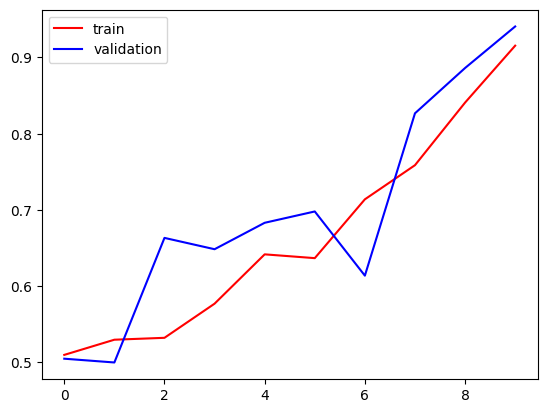

In [20]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

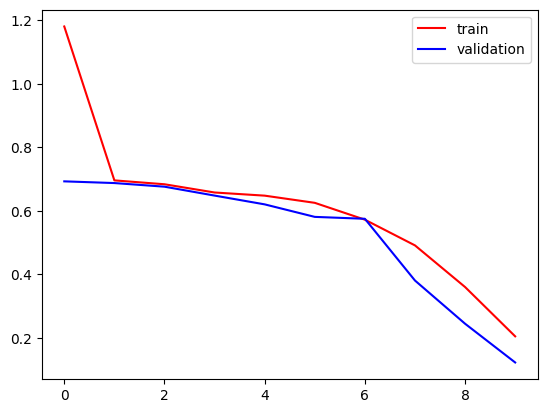

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [23]:
import cv2

In [24]:
test_img = cv2.imread('dog.jpeg')

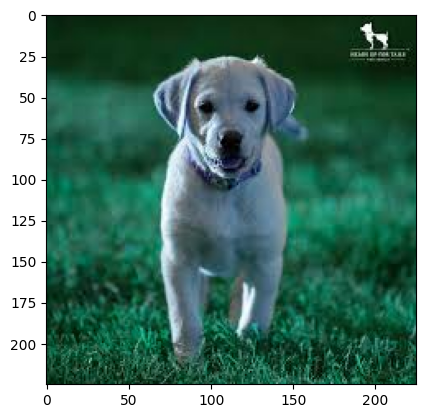

In [25]:
plt.imshow(test_img)

In [27]:
test_img.shape


(225, 225, 3)

In [29]:
test_img = cv2.resize(test_img,(256,256))

In [30]:
test_input = test_img.reshape((1,256,256,3))

In [32]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


array([[1.]], dtype=float32)

In [33]:
test_img = cv2.imread('cat.jpeg')

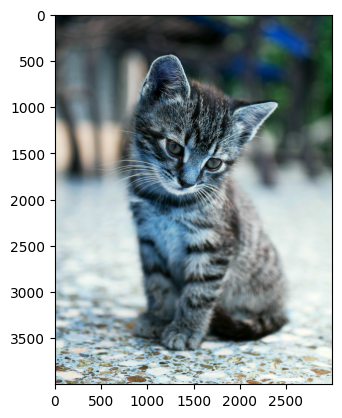

In [34]:
plt.imshow(test_img)

In [35]:
test_img.shape

(3999, 3000, 3)

In [36]:
test_img = cv2.resize(test_img,(256,256))

In [37]:
test_input = test_img.reshape((1,256,256,3))

In [38]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[0.]], dtype=float32)